# Supervised Learning
Decision boundaries of a model help understand the behavior of the model or the generalization ability of a model greatly. For example, a linear-like surface or a smooth curve with fewer corners improves generalization. SVM maximizes this boundary region to have data points far from the boundary. Neural network just places the boundaries as long as the classification error is minimized. Thus, SVM has a single solution compared to numerous possible solutions by a NN. (Why?) Similarly, the other algorithms create the surface according to their built-in criteria. Observe the decision tree classifier decision surfaces as horizontal and vertical lines below.

First, create and visualize the experimental dataset. The $\texttt{make\_blobs}$ create 5 clusters with different cardinality of members (i.e., 100, 500, 500, 500, 1000) using means and standard deviations as below.  Observe that the green class overlaps all other classes, and the orange class can be lost. A good exercise is measuring the performance of the orange class by computing a confusion matrix of 5-fold cross-validation evaluation.


In [1]:
import os
os.environ["OMP_NUM_THREADS"] = "2"

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.dpi"] = 72
import numpy as np


# Following functions only work in 2-dimensions, i.e. X with 2 features
# And upto 5 clusters/classes

def get_minmax(_X, _m):  # _m = margin for visuals
    return _X[:,0].min()-_m, _X[:,0].max()+_m, _X[:,1].min()-_m, _X[:,1].max()+_m

def plotX(_X, _y, ax=None):  # Max 5 clusters/classes
    Colors = ['darkorchid', 'darkgreen', 'darkgrey', 'darksalmon', 'darkseagreen']
    Markers = ['o', '+', 'x', '1', '.']
    for c in range(max(_y)+1):
        plt.scatter(_X[_y==c,0], _X[_y==c,1], marker=Markers[c], color=Colors[c])
    if ax is not None:
        ax.get_xaxis().set_ticks([])
        ax.get_yaxis().set_ticks([])

    x1_min, x1_max, x2_min, x2_max = get_minmax(_X, 1)
    plt.xlim(x1_min, x1_max)
    plt.ylim(x2_min, x2_max)
    plt.xlabel(r'$x_1$', horizontalalignment='right', x=1.0)
    plt.ylabel(r'$x_2$', horizontalalignment='right', y=1.0)

In [5]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
# 10-fold CV evaluation of a classifier
def eval_classifier(_clf, _X, _y):
    accuracies = []
    kf = StratifiedKFold(n_splits=10, shuffle=False)
    for train_index, test_index in kf.split(_X, _y):
        _clf.fit(_X[train_index], _y[train_index])
        y_pred = _clf.predict(_X[test_index])
        accuracies += [accuracy_score(_y[test_index], y_pred)]
    return np.array(accuracies)

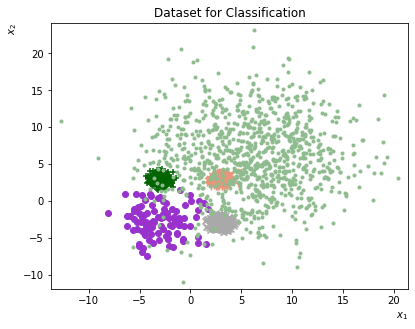

In [6]:
from sklearn.datasets import make_blobs

# 5 classes with 2 features
X1, y1 = make_blobs(n_samples=(100, 500, 500, 500, 1000), n_features=2, random_state=0,
                    cluster_std=[2, .5, .5, .5, 5],
                    centers=[(-3, -3), (-3, 3), (3, -3), (3, 3), (6, 6)])

plotX(X1, y1)
plt.title('Dataset for Classification')

plt.savefig('fig_ml01.svg', dpi=300, bbox_inches='tight')

In [7]:
def plot_decisionboundary(_X, _clf, _h, color_db='r'):  # _h = step size in the mesh
    x1_min, x1_max, x2_min, x2_max = get_minmax(_X, 1)
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, _h), np.arange(x2_min, x2_max, _h))
    Y = _clf.predict(np.c_[xx1.ravel(), xx2.ravel()]).reshape(xx1.shape)
    
    # debug
    # print(np.unique(Y,return_counts=True))

    plt.contour(xx1, xx2, Y, colors=color_db, linestyles='dotted')


h = 0.1  # mesh granularity of the plot

def plot_clf(_clf, _name):
    plotX(X1, y1)
    plot_decisionboundary(X1, _clf, h)
    # plt.title(_name, y=0.90)
    plt.title(_name)

## Ridge Regression as a Classifier Example

Ridge Regression Classifier CV accuracy=0.68 ±0.016


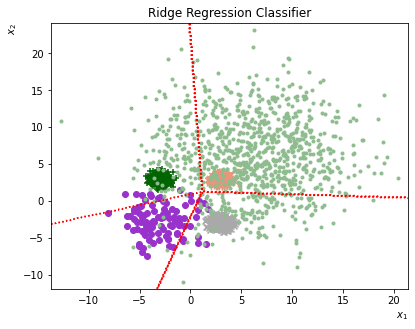

In [9]:
from sklearn.linear_model import RidgeClassifier

name = 'Ridge Regression Classifier'
clf = RidgeClassifier(class_weight='balanced').fit(X1, y1)

plot_clf(clf, name)
plt.savefig('fig_ml_rr.svg', dpi=300, bbox_inches='tight')

acc = eval_classifier(clf, X1, y1)
print(f'{name} CV accuracy={np.mean(acc):.2f} {chr(177)}{np.std(acc):.3f}')

## Logistic Regression Classifier Example

Logistic Regression Classifier CV accuracy=0.88 ±0.020


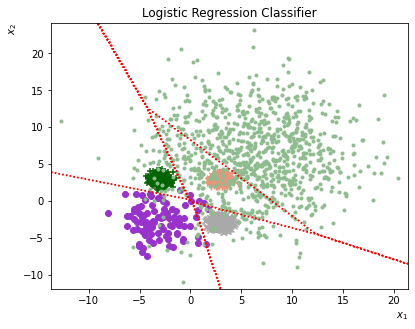

In [10]:
from sklearn.linear_model import LogisticRegression

name = 'Logistic Regression Classifier'
clf = LogisticRegression(class_weight='balanced').fit(X1, y1)

plot_clf(clf, name)
plt.savefig('fig_ml_lr.svg', dpi=300, bbox_inches='tight')

acc = eval_classifier(clf, X1, y1)
print(f'{name} CV accuracy={np.mean(acc):.2f} {chr(177)}{np.std(acc):.3f}')

## Support Vector Machine Classifier (linear kernel) Example

SVM Classifier (linear kernel) CV accuracy=0.86 ±0.021


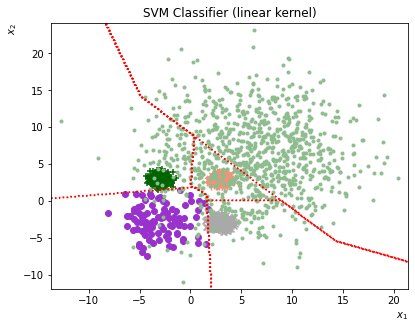

In [11]:
from sklearn.svm import SVC

name = 'SVM Classifier (linear kernel)'
clf = SVC(class_weight='balanced', kernel='linear', C=2).fit(X1, y1)

plot_clf(clf, name)
plt.savefig('fig_ml_svm1.svg', dpi=300, bbox_inches='tight')

acc = eval_classifier(clf, X1, y1)
print(f'{name} CV accuracy={np.mean(acc):.2f} {chr(177)}{np.std(acc):.3f}')

## Support Vector Machine Classifier (RBF kernel) Example

SVM Classifier (RBF kernel) CV accuracy=0.96 ±0.012


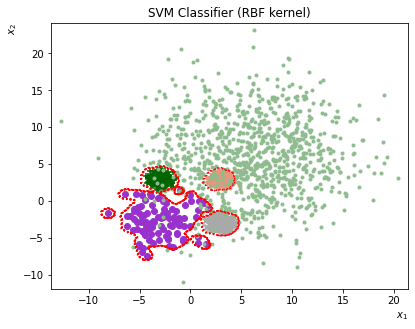

In [12]:
from sklearn.svm import SVC

name = 'SVM Classifier (RBF kernel)'
clf = SVC(class_weight='balanced', kernel='rbf', gamma=2, C=2).fit(X1, y1)

plot_clf(clf, name)
plt.savefig('fig_ml_svm2.svg', dpi=300, bbox_inches='tight')

acc = eval_classifier(clf, X1, y1)
print(f'{name} CV accuracy={np.mean(acc):.2f} {chr(177)}{np.std(acc):.3f}')

## Decision Tree Classifier Example

Decision Tree Classifier CV accuracy=0.95 ±0.011


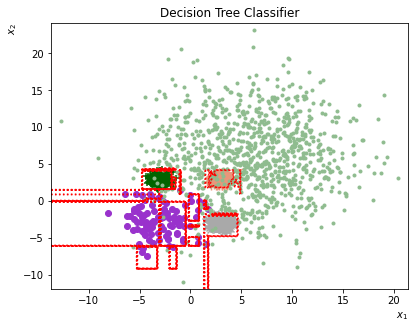

In [13]:
from sklearn.tree import DecisionTreeClassifier

name = 'Decision Tree Classifier'
clf = DecisionTreeClassifier(class_weight='balanced').fit(X1, y1)

plot_clf(clf, name)
plt.savefig('fig_ml_dt.svg', dpi=300, bbox_inches='tight')

acc = eval_classifier(clf, X1, y1)
print(f'{name} CV accuracy={np.mean(acc):.2f} {chr(177)}{np.std(acc):.3f}')

## Random Forest Classifier Example

Random Forest Classifier CV accuracy=0.97 ±0.010


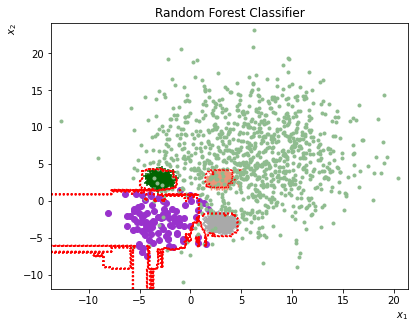

In [14]:
from sklearn.ensemble import RandomForestClassifier

name = 'Random Forest Classifier'
clf = RandomForestClassifier(class_weight='balanced').fit(X1, y1)

plot_clf(clf, name)
plt.savefig('fig_ml_rf.svg', dpi=300, bbox_inches='tight')

acc = eval_classifier(clf, X1, y1)
print(f'{name} CV accuracy={np.mean(acc):.2f} {chr(177)}{np.std(acc):.3f}')

## Neural Network Classifier Example

Neural Network Classifier CV accuracy=0.95 ±0.013


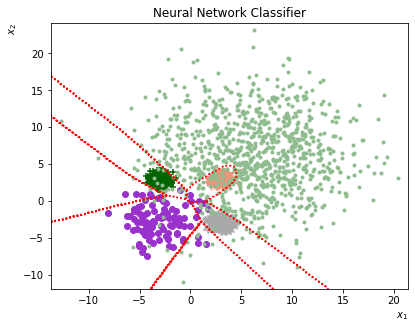

In [15]:
from sklearn.neural_network import MLPClassifier

name = 'Neural Network Classifier'
clf = MLPClassifier(tol=1e-2, solver='lbfgs').fit(X1, y1)

plot_clf(clf, name)
plt.savefig('fig_ml_nn.svg', dpi=300, bbox_inches='tight')

acc = eval_classifier(clf, X1, y1)
print(f'{name} CV accuracy={np.mean(acc):.2f} {chr(177)}{np.std(acc):.3f}')

***
# Deep Learning

In [1]:
import numpy as np
import sys

import torch
from torch import nn, optim
import torchvision
print(f'PyTorch version= {torch.__version__}')
print(f'torchvision version= {torchvision.__version__}')
print(f'CUDA available= {torch.cuda.is_available()}')

# Set the GPU to device 0
Device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
#Device = torch.device("cpu")

PyTorch version= 2.3.1
torchvision version= 0.18.1
CUDA available= False


In [7]:
from torch.utils.data import DataLoader
from torchvision.datasets import MNIST
from torchvision.transforms import Compose, ToTensor, Resize, Normalize

IMG_SIZE= 28

dsTrain = MNIST(root = "../data sets/",
                train=True, download=True,  # set download to True if there is no dataset loaded
                transform=Compose([ToTensor(), Resize([IMG_SIZE,IMG_SIZE], antialias=True), Normalize((0.5,), (0.5,))]))
dsTest = MNIST(root = "../data sets/",
               train=False, download=True,  # set download to True if there is no dataset loaded
               transform=Compose([ToTensor(), Resize([IMG_SIZE,IMG_SIZE], antialias=True), Normalize((0.5,), (0.5,))]))

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%


Extracting ../data sets/MNIST/raw/train-images-idx3-ubyte.gz to ../data sets/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%


Extracting ../data sets/MNIST/raw/train-labels-idx1-ubyte.gz to ../data sets/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%


Extracting ../data sets/MNIST/raw/t10k-images-idx3-ubyte.gz to ../data sets/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%

Extracting ../data sets/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../data sets/MNIST/raw



In [8]:
N_CLASSES = 10  # output layer size

BATCH_SIZE = 4096

DloaderTrain = DataLoader(dataset=dsTrain, batch_size=BATCH_SIZE, shuffle=True)
DloaderTest = DataLoader(dataset=dsTest, batch_size=BATCH_SIZE, shuffle=False)

In [9]:
from sklearn.metrics import accuracy_score

class PyTorchNN(nn.Module):
    def __init__(self, epochs=10, eta=0.001, batch_size=1000, seed=0):
        super().__init__()
        self.random = np.random.RandomState(seed)  # shuffle mini batches
        self.epochs = epochs  # number of iterations
        self.eta = eta  # learning rate
        self.batch_size = batch_size  # size of training batch - 1 would not work
        self.loss_func = nn.CrossEntropyLoss()
        self.model = None

    def init_layers(self, _K):
        self.model = nn.Sequential(
            nn.Linear(IMG_SIZE*IMG_SIZE, 1024),
            nn.Sigmoid(),
            nn.Linear(1024, 256),
            nn.Sigmoid(),
            nn.Linear(256, _K),            
        ).to(Device)

    def predict(self, _X):
        _X = torch.FloatTensor(_X).to(Device, non_blocking=True)
        assert self.model is not None
        with torch.no_grad():
            logits = self.model(_X)
        ypred = torch.argmax(logits, dim=1)
        return ypred.cpu().numpy()

    def getdata(self, _dt):  # Linear layer requires flattening
        return _dt.reshape(-1,IMG_SIZE*IMG_SIZE)

    def fit(self, _train_dl, info=False):
        self.init_layers(N_CLASSES)

        optimizer = optim.Rprop(self.model.parameters(), lr=self.eta)

        for e in range(self.epochs):
            for data in _train_dl:
                X, y = self.getdata(data[0]).to(Device), data[1].to(Device)

                optimizer.zero_grad()
                net_out = self.model(X)
                loss = self.loss_func(net_out, y)
                loss.backward()
                optimizer.step()
                
            if info:
                with torch.no_grad():
                    acc = accuracy_score(data[1].tolist(), np.argmax(self.model(X).cpu(), axis=1).tolist())
                sys.stderr.write(f"\r{e+1:02d}/{self.epochs:02d} | Loss: {loss:<6.2f} | Tr Acc: {acc*100:3.2f}%")
                sys.stderr.flush()

In [10]:
nnet = PyTorchNN(epochs=20, eta=0.001, batch_size=BATCH_SIZE).to(Device)

In [11]:
%%time

nnet.fit(DloaderTrain, info=True) 

20/20 | Loss: 0.10   | Tr Acc: 96.95%

CPU times: user 4min 29s, sys: 7min 23s, total: 11min 53s
Wall time: 1min 19s


In [12]:
# Test performance
y_test, y_pred = [], []
for dt in DloaderTest:
    X = dt[0].reshape(-1,IMG_SIZE*IMG_SIZE)
    y_test += dt[1].tolist()

    with torch.no_grad():
        y_pred += nnet.predict(X).tolist()

accuracy_score(y_test, y_pred)

0.9606

## Convolutional Neural Network

In [13]:
IMG_CHANNEL= 1  # color channel

MLP_HIDDEN= 16  # Hidden layer size

LAST_LINEAR_SIZE = 1024  # 1024 is arbitrary

class PyTorchCNN(PyTorchNN):  # extend the previous class
    def __init__(self, epochs=10, eta=0.001, batch_size=1000, seed=0):
        super().__init__(epochs, eta, batch_size, seed)

    def init_layers(self, _K):
        self.model = nn.Sequential(
            # Conv -> (?, IMG_SIZE, IMG_SIZE, MLP_HIDDEN)
            # Pool -> (?, IMG_SIZE/2, IMG_SIZE/2, MLP_HIDDEN)
            nn.Conv2d(IMG_CHANNEL, MLP_HIDDEN, 5),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2),
            nn.BatchNorm2d(MLP_HIDDEN),

            nn.Conv2d(MLP_HIDDEN, MLP_HIDDEN*2, 5),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2),

            nn.Flatten(start_dim=1),
            
            # 4*4 is computed in the above cell - findConv2dOutShape
            nn.Linear(MLP_HIDDEN*2 * 4*4, LAST_LINEAR_SIZE),
            nn.BatchNorm1d(LAST_LINEAR_SIZE),
            
            nn.Linear(LAST_LINEAR_SIZE, _K),
        ).to(Device)

    def getdata(self, dt):  # CNN layer does not require flattening
        return dt

In [14]:
cnnet = PyTorchCNN(epochs=7, eta=0.001, batch_size=BATCH_SIZE).to(Device)

In [15]:
%%time

cnnet.fit(DloaderTrain, info=True) 

07/07 | Loss: 0.05   | Tr Acc: 98.53%

CPU times: user 5min 19s, sys: 7min 58s, total: 13min 17s
Wall time: 1min 28s


In [16]:
# Test performance
y_test, y_pred = [], []
for dt in DloaderTest:
    X = dt[0]
    y_test += dt[1].tolist()

    with torch.no_grad():
        y_pred += cnnet.predict(X).tolist()

accuracy_score(y_test, y_pred)

0.9855

## Recurrent Neural Network

In [19]:
import pandas as pd
# Read the dataset, surnames, 18 countries
df = pd.read_csv('../data sets/surnames.csv', on_bad_lines='skip').sample(frac=1)
df[:10].to_markdown('table0601.md')

df.head()

,surname,country
5007,Kyle,English
19769,Castellano,Spanish
2284,Blahut,Czech
13894,Haskin,Russian
12533,Djatdoev,Russian


In [20]:
RNN_SEQUENCE_LENGTH = 20  # sequence length, pre-set

def string2intarray(_s):
    x = np.zeros(RNN_SEQUENCE_LENGTH)
    _s = list(map(ord, _s))  # convert each char to integer, ASCII mapping by ord
    x[:len(_s)] = np.array(_s, dtype=int)
    return x

X = np.array([_ for _ in df.surname.astype(str).apply(string2intarray)])  # each position of the sequence is a feature now

N = X.shape[0]

# size of vocabulary - in this case number of unique letters
X2ix = {_:i for i,_ in enumerate(sorted(np.unique(X)))}
M = len(X2ix)
f = np.vectorize(lambda _:X2ix[_])
X = f(X)

print(X.shape)
print(df.surname.iloc[10:15])
print(X[10:15])

# countries
yNames = sorted(df.country.unique())
yNames2ix = {_:i for i,_ in enumerate(yNames)}
C = len(yNames)
print(f'Vocabulary size={M}, output size={C}')

y = df.country.apply(lambda _ : yNames2ix[_])

X, y = torch.IntTensor(X).to(Device), torch.LongTensor(y).to(Device)

(20074, 20)
10008       Gomolka
14541       Jeludev
14044    Holodovsky
7711         Weeber
5408          Myers
Name: surname, dtype: object
[[14 48 46 48 45 44 34  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [17 38 45 54 37 38 55  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [15 48 45 48 37 48 55 52 44 58  0  0  0  0  0  0  0  0  0  0]
 [30 38 38 35 38 51  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [20 58 38 51 52  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]]
Vocabulary size=88, output size=18


In [21]:
unique, counts = np.unique(df.country, return_counts=True)

WEIGHTS = torch.tensor([_/N for _ in counts], dtype=torch.float32).to(Device)

print(WEIGHTS)

tensor([0.0996, 0.0134, 0.0259, 0.0148, 0.1827, 0.0138, 0.0361, 0.0101, 0.0116,
        0.0353, 0.0494, 0.0047, 0.0069, 0.0037, 0.4687, 0.0050, 0.0148, 0.0036])


In [22]:
EMBEDDING_M= 10

class PyTorchRNN(nn.Module):  # One hidden layer
    def __init__(self, n_hidden, n_hid_layers=1, epochs=10, eta=0.0005, batch_size=100, weight=None):
        super().__init__()
        self.n_hidden= n_hidden  # hidden layer size

        self.epochs= epochs  # number of learning iterations
        self.eta= eta  # learning rate
        self.B= batch_size  # size of training batch - 1 would not work
        self.random = np.random.RandomState(0)  # shuffle mini batches

        self.rnn, self.outlayer = None, None

        self.softmax = nn.LogSoftmax(dim=1)
        # loss function, since the last layer is nn.LogSoftmax
        self.loss_func = nn.NLLLoss(weight=weight)

    def forward(self, _X):
        embeds = self.letter_embeddings(_X)
        lstm_out, _ = self.rnn(embeds)  # output is batched
        output = self.outlayer(lstm_out[:, -1, :])
        output = self.softmax(output)
        return output
    
    def predict(self, _X):
        with torch.no_grad():
            output = self.forward(_X)
        p_values, indices = output.max(dim=1)
        return indices.to('cpu')

    def fit(self, _X_train, _y_train, info=False):
        self.letter_embeddings = nn.Embedding(M, EMBEDDING_M).to(Device)
        self.rnn = nn.LSTM(EMBEDDING_M, self.n_hidden, bias=False, batch_first=True).to(Device)
        self.outlayer = nn.Linear(self.n_hidden, C).to(Device)

        self.optimizer = optim.Rprop(self.parameters(), lr=self.eta)  # connect model to optimizer

        for i in range(self.epochs):
            indices = np.arange(_X_train.shape[0])
            self.random.shuffle(indices)  # shuffle the data each epoch

            for start_idx in range(0, indices.shape[0] - self.B + 1, self.B):
                batch_idx = indices[start_idx:start_idx + self.B]
                self.optimizer.zero_grad()
                
                net_out = self.forward(_X_train[batch_idx])
                
                loss = self.loss_func(net_out, _y_train[batch_idx])
                loss.backward()
                self.optimizer.step()
                
                if info:
                    sys.stderr.write(f"\r{i+1:03d} Loss: {loss.item():6.5f}")
                    sys.stderr.flush()
        return self

In [23]:
lstm = PyTorchRNN(256, epochs=2000, eta=0.005, batch_size=N, weight=WEIGHTS).to(Device)
lstm.fit(X, y, info=True) ;

2000 Loss: 0.01320

In [24]:
y_pred = lstm.predict(X)
Acc = np.sum(np.array(y_pred) == np.array(y.cpu()))/len(y_pred)
    
print(f'RNN reclassification Acc= {np.mean(Acc):.2f} {chr(177)}{np.std(Acc):.3f}')

RNN reclassification Acc= 0.95 ±0.000


In [25]:
# printing the confusion matrix below
def get_cm(_y, _p):
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(_y, _p, labels=list(range(len(yNames))))
    return pd.DataFrame(cm, index=[_[:5] for _ in yNames], columns=[_[:5] for _ in yNames])

In [28]:
df_ = get_cm(y.cpu(), y_pred)
df_[:10].to_markdown('table0602.md')
df_

,Arabi,Chine,Czech,Dutch,Engli,Frenc,Germa,Greek,Irish,Itali,Japan,Korea,Polis,Portu,Russi,Scott,Spani,Vietn
Arabi,2000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Chine,0,237,0,0,18,0,1,0,0,1,2,0,0,0,9,0,0,0
Czech,0,0,461,3,29,2,17,0,0,0,1,0,0,0,6,0,0,0
Dutch,0,0,5,186,58,1,35,0,0,2,1,0,0,0,9,0,0,0
Engli,3,0,0,0,3638,0,0,0,0,0,0,0,0,0,27,0,0,0
Frenc,0,1,3,3,100,139,14,0,1,1,0,0,0,0,13,0,2,0
Germa,1,0,0,3,58,1,643,0,0,1,0,0,0,0,17,0,0,0
Greek,0,0,0,0,12,0,0,191,0,0,0,0,0,0,0,0,0,0
Irish,0,0,4,1,103,2,4,0,107,1,0,0,0,0,9,0,1,0
Itali,0,0,0,0,9,0,1,0,0,698,0,0,0,0,1,0,0,0
